# Assignment 2

## Project Overview

Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

- Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
- Is there a difference in unit sold based on building category?
- What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

## Data Preparation

Pertama kita harus perpustakaan yang akan kita gunakan.

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/raraditapurnamareta/H8_4/PYTN_Assgn_2_4_RaraDitaPurnamaReta/nyc-rolling-sales.csv')

print('Dataset is ready!')

Dataset is ready!


Lihat 5 baris teratas set data

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Lihat 5 baris terbawah set data

In [4]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


Lihat semua kolom dan tipe data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Melihat shape di dataset

In [6]:
df.shape

(84548, 22)

Melihat header list

In [7]:
df.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

## Pre-Processing

Pertama, drop kolom yang tidak relevan

In [8]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

Memperbaiki tipe data hingga saat ini, 'coerce' berarti penguraian yang tidak valid akan ditetapkan sebagai NaN

In [9]:
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')

Memperbaiki tipe data menjadi numerik, 'coerce' berarti penguraian yang tidak valid akan ditetapkan sebagai NaN

In [10]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

Memperbaiki tipe data menjadi kategorikal

In [11]:
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 
               'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

Cek data type

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

Cek missing value

In [13]:
df.isna().sum()/len(df)

BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
TAX CLASS AT PRESENT              0.000000
BLOCK                             0.000000
LOT                               0.000000
EASE-MENT                         0.000000
BUILDING CLASS AT PRESENT         0.000000
ADDRESS                           0.000000
APARTMENT NUMBER                  0.000000
ZIP CODE                          0.000000
RESIDENTIAL UNITS                 0.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.310498
GROSS SQUARE FEET                 0.326584
YEAR BUILT                        0.000000
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.172222
SALE DATE                         0.000000
dtype: float64

Cek blank cells as NaN

In [14]:
df.replace(' ',np.nan, inplace=True)
df.isna().sum() /len(df)

BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
TAX CLASS AT PRESENT              0.008729
BLOCK                             0.000000
LOT                               0.000000
EASE-MENT                         1.000000
BUILDING CLASS AT PRESENT         0.008729
ADDRESS                           0.000000
APARTMENT NUMBER                  0.774661
ZIP CODE                          0.000000
RESIDENTIAL UNITS                 0.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.310498
GROSS SQUARE FEET                 0.326584
YEAR BUILT                        0.000000
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.172222
SALE DATE                         0.000000
dtype: float64

Cek duplicate value

In [15]:
df.duplicated().sum()

765

Drop duplicate values

In [16]:
df.drop_duplicates(inplace=True)

Drop columns with too many NaN

In [17]:
df.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)

Menampilkan skewness of columns

In [18]:
df.skew(axis=0, skipna=True)

/var/folders/lv/sc7txngx7sz18x_p67l6s_hw0000gn/T/ipykernel_56035/3081074228.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis=0, skipna=True)


BLOCK                  1.046322
LOT                    3.506785
RESIDENTIAL UNITS     62.058053
COMMERCIAL UNITS     224.990028
TOTAL UNITS           65.249327
LAND SQUARE FEET      75.762320
GROSS SQUARE FEET     61.121216
SALE PRICE           123.943132
dtype: float64

Hitung nilai yang hilang.

Untuk tipe data numerik: jika skew < +-2 maka hubungkan dengan rata-rata, jika skew > +-2 maka hubungkan dengan median

Untuk tipe data kategorik: hubungkan dengan mode

In [19]:
df["TAX CLASS AT PRESENT"]=df["TAX CLASS AT PRESENT"].fillna(df["TAX CLASS AT PRESENT"].mode())
df["BUILDING CLASS AT PRESENT"]=df["BUILDING CLASS AT PRESENT"].fillna(df["BUILDING CLASS AT PRESENT"].mode())
df["LAND SQUARE FEET"]=df["LAND SQUARE FEET"].fillna(df["LAND SQUARE FEET"].median())
df["GROSS SQUARE FEET"]=df["GROSS SQUARE FEET"].fillna(df["GROSS SQUARE FEET"].median())
df["SALE PRICE"]=df["SALE PRICE"].fillna(df["SALE PRICE"].median())

Cek missing value

In [20]:
df.isna().sum()/len(df)

BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
TAX CLASS AT PRESENT              0.008808
BLOCK                             0.000000
LOT                               0.000000
BUILDING CLASS AT PRESENT         0.008808
ADDRESS                           0.000000
ZIP CODE                          0.000000
RESIDENTIAL UNITS                 0.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.000000
GROSS SQUARE FEET                 0.000000
YEAR BUILT                        0.000000
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.000000
SALE DATE                         0.000000
dtype: float64

Cek strange value

In [21]:
a = df['YEAR BUILT'].drop_duplicates()
a

0        1900
3        1913
6        1920
10       1910
11       2009
         ... 
33557    1871
39533    1893
44615    1865
45042    1882
81875    1680
Name: YEAR BUILT, Length: 158, dtype: category
Categories (158, int64): [0, 1111, 1680, 1800, ..., 2014, 2015, 2016, 2017]

Cek strange value

In [22]:
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,8.378300e+04,8.378300e+04,8.378300e+04
mean,4242.903155,376.137415,1.999976,0.183677,2.213504,3.375438e+03,3.170620e+03,1.154192e+06
std,3568.789482,658.021286,16.569118,8.576582,18.777727,3.449485e+04,2.860114e+04,1.042234e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1326.000000,22.000000,0.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,3.000000e+05
50%,3319.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,5.330000e+05
75%,6295.000000,1001.000000,2.000000,0.000000,2.000000,2.650000e+03,2.080000e+03,8.350000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


Hitung nilai '0' di kolom tersebut

In [23]:
print("YEAR BUILT '0' Count: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("TOTAL UNIT '0' Count: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("SALE PRICE '0' Count: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())

YEAR BUILT '0' Count:  6885
TOTAL UNIT '0' Count:  19677
SALE PRICE '0' Count:  10012


Kolom tersebut tidak boleh memiliki nilai '0

In [24]:
df['YEAR BUILT'].replace(0, np.nan, inplace=True)
df['TOTAL UNITS'].replace(0, np.nan, inplace=True)
df['SALE PRICE'].replace(0, np.nan, inplace=True)

Pastikan nilainya sudah di drop

In [25]:
print("YEAR BUILT '0' Count: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("TOTAL UNIT '0' Count: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("SALE PRICE '0' Count: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())

YEAR BUILT '0' Count:  0
TOTAL UNIT '0' Count:  0
SALE PRICE '0' Count:  0


Drop missing value

In [26]:
df.dropna(inplace=True)

Lihat semua kolom dan tipe data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51546 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         51546 non-null  category      
 1   NEIGHBORHOOD                    51546 non-null  category      
 2   BUILDING CLASS CATEGORY         51546 non-null  category      
 3   TAX CLASS AT PRESENT            51546 non-null  category      
 4   BLOCK                           51546 non-null  int64         
 5   LOT                             51546 non-null  int64         
 6   BUILDING CLASS AT PRESENT       51546 non-null  category      
 7   ADDRESS                         51546 non-null  object        
 8   ZIP CODE                        51546 non-null  category      
 9   RESIDENTIAL UNITS               51546 non-null  int64         
 10  COMMERCIAL UNITS                51546 non-null  int64         
 11  TO

Membuat SALE PRICE's boxplot untuk melihat outliers

/Users/raraditapurnamareta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


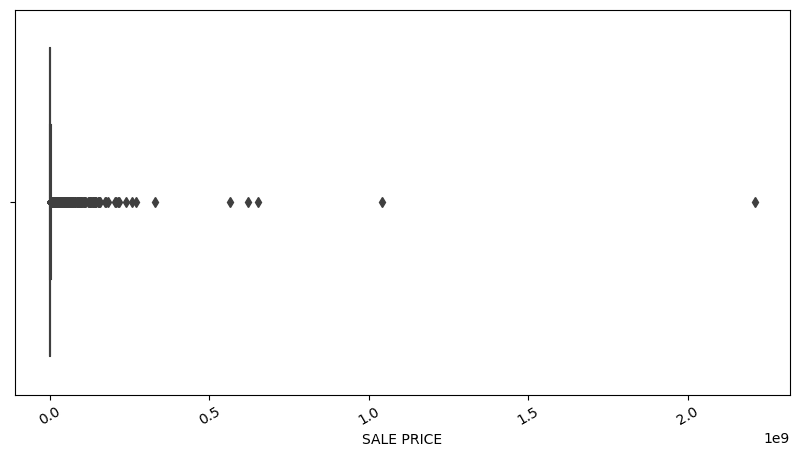

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(df["SALE PRICE"])
plt.xticks(rotation=30)
plt.show()

Ada terlalu banyak outlier, jadi filter nilai di SALE PRICE

In [29]:
df = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 800000)]

Buat boxplot SALE PRICE untuk melihat data outlier setelah difilter

/Users/raraditapurnamareta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


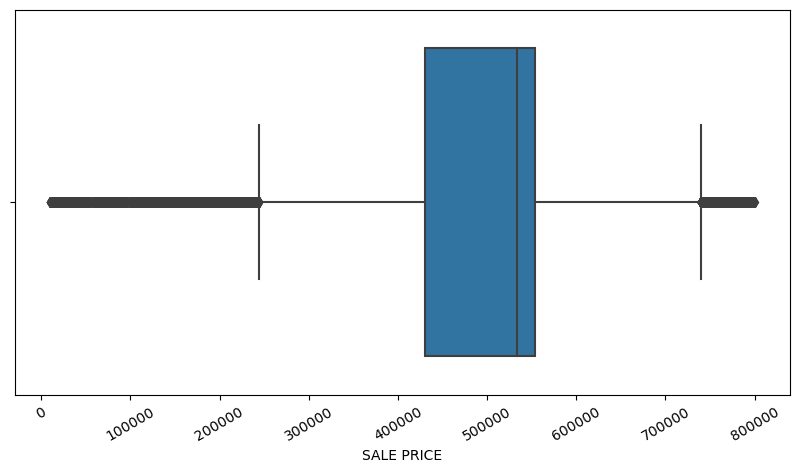

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(df["SALE PRICE"])
plt.xticks(rotation=30)
plt.show()

Lihat semua kolom dan tipe data

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33900 entries, 1 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         33900 non-null  category      
 1   NEIGHBORHOOD                    33900 non-null  category      
 2   BUILDING CLASS CATEGORY         33900 non-null  category      
 3   TAX CLASS AT PRESENT            33900 non-null  category      
 4   BLOCK                           33900 non-null  int64         
 5   LOT                             33900 non-null  int64         
 6   BUILDING CLASS AT PRESENT       33900 non-null  category      
 7   ADDRESS                         33900 non-null  object        
 8   ZIP CODE                        33900 non-null  category      
 9   RESIDENTIAL UNITS               33900 non-null  int64         
 10  COMMERCIAL UNITS                33900 non-null  int64         
 11  TO

Enkode nilai BOROUGH

In [32]:
df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31.0,4616.0,18690.0,1900,2,C7,533000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17.0,2212.0,7803.0,1900,2,C7,533000.0,2016-12-09
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,10009,20,0,20.0,2581.0,9730.0,1900,2,C4,533000.0,2017-07-20
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,10009,44,2,46.0,5163.0,21007.0,1900,2,C7,533000.0,2017-07-20
8,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,10009,15,0,15.0,1534.0,9198.0,1920,2,D5,533000.0,2017-06-20


## EDA

Setelah data bersih, kita akan melakukan Exploratory Data Analysis

### Mean

Hitung rata-rata SALE PRICE untuk setiap BOROUGH

In [33]:
mean1 = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True)
mean1

,SALE PRICE
BOROUGH,
Bronx,448221.910236
Staten Island,475511.350783
Brooklyn,506525.692929
Queens,512513.827403
Manhattan,540871.630934


Insight: Dari tabel di atas, kita tahu bahwa Manhattan memiliki rata-rata tertinggi di antara borough lainnya

Hitung setiap rata-rata Borough

In [34]:
mean2 = df.groupby('BOROUGH').mean()
mean2

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,1162.235775,1042.289532,5.520277,0.942471,6.589437,2984.648538,9445.558001,540871.630934
Bronx,4227.301582,121.418147,2.142719,0.046497,2.189538,2657.919600,2368.765580,448221.910236
Brooklyn,5072.049242,377.465629,1.748867,0.062438,1.836912,1953.229860,1703.881032,506525.692929
Queens,7719.626989,232.077177,2.194592,0.223315,2.454457,3907.603830,2873.149243,512513.827403
Staten Island,3256.191901,216.170312,1.306759,0.059546,1.369268,4336.345703,1886.482856,475511.350783


Dari tabel di atas, kita tahu bahwa Manhattan memiliki rata-rata tertinggi di sebagian besar kolom di antara borough lainnya

### Median

Hitung median 'SALE PRICE' untuk setiap BOROUGH

In [35]:
median = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=True)
median

,SALE PRICE
BOROUGH,
Bronx,450000.0
Manhattan,533000.0
Queens,533000.0
Staten Island,533000.0
Brooklyn,534900.0


Dari tabel di atas, kita tahu bahwa Bronx memiliki median terendah sedangkan Brooklyn memiliki median tertinggi, dan tiga borough lainnya memiliki median yang sama

### Modus

Hitung 'TOTAL UNITS' mode of each BOROUGH

In [36]:
mode1 = df[['BOROUGH','TOTAL UNITS']].groupby(['BOROUGH']).apply(pd.DataFrame.mode).reset_index(drop=True)
mode1

,BOROUGH,TOTAL UNITS
0,Manhattan,1.0
1,Bronx,2.0
2,Brooklyn,1.0
3,Queens,1.0
4,Staten Island,1.0


Dari tabel di atas, kita tahu bahwa Bronx paling banyak memiliki 2 unit, sedangkan borough lainnya kebanyakan memiliki 1 unit

### Range

Hitung kisaran SALE PRICE untuk setiap BOROUGH

In [37]:
range1 = df.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max() - x['SALE PRICE'].min())
range1

BOROUGH
Manhattan        789450.0
Bronx            787000.0
Brooklyn         789286.0
Queens           789998.0
Staten Island    788500.0
dtype: float64

Semua Borough memiliki range yang tidak jauh berbeda

### Variance

Hitung varian dari setiap BOROUGH

In [38]:
var = df.groupby('BOROUGH').var()
var

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,3.108470e+05,714732.485013,1414.347781,164.646689,1591.971008,5.044313e+07,3.428788e+09,1.192937e+10
Bronx,9.003173e+05,74775.879038,81.316188,0.072127,81.289968,1.358062e+07,7.096750e+07,2.514468e+10
Brooklyn,6.422118e+06,295398.495519,40.253114,0.128291,40.302790,2.406243e+08,6.978924e+07,3.833475e+10
Queens,1.978078e+07,228180.494205,542.833581,330.971542,883.666070,2.385042e+09,1.927086e+09,1.831669e+10
Staten Island,5.123645e+06,205892.589533,5.996769,2.352649,8.234353,7.861274e+08,7.322751e+07,1.939413e+10


Dari tabel di atas, kita mengetahui bahwa hampir semua borough memiliki nilai variansi yang tinggi, yang berarti data memiliki distribusi yang besar

### Standard Deviation

Hitung standar deviasi dari setiap BOROUGH

In [39]:
sd = df.groupby('BOROUGH').std()
sd

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,557.536507,845.418527,37.607815,12.831473,39.899511,7102.332724,58555.852895,109221.638628
Bronx,948.850527,273.451786,9.017549,0.268564,9.016095,3685.189370,8424.220830,158570.756499
Brooklyn,2534.189819,543.505746,6.344534,0.358178,6.348448,15512.068491,8353.995550,195792.624077
Queens,4447.559356,477.682420,23.298789,18.192623,29.726521,48836.893171,43898.586270,135339.181140
Staten Island,2263.547069,453.753887,2.448830,1.533835,2.869556,28037.964065,8557.307363,139262.818182


Dari tabel di atas, kita mengetahui bahwa sebagian besar borough memiliki nilai standar deviasi yang tinggi, yang berarti data memiliki distribusi yang besar

### Probability Distribution

Buat distribusi probabilitas HARGA JUAL Bronx

/Users/raraditapurnamareta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'price'),
 Text(0, 0.5, 'probability of occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Bronx')]

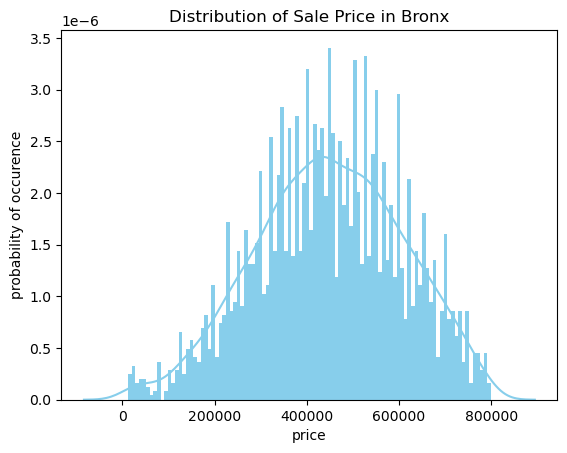

In [40]:
df1=df.groupby("BOROUGH")
br = df1.get_group('Bronx')

ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='price', ylabel='probability of occurence', title='Distribution of Sale Price in Bronx')

Buat distribusi probabilitas HARGA JUAL Bronx

/Users/raraditapurnamareta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


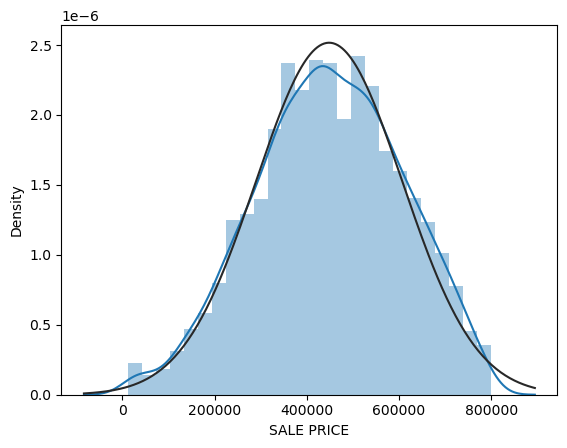

In [41]:
from scipy.stats import norm
x = pd.Series(br['SALE PRICE'].values, name="SALE PRICE")
ax = sns.distplot(x, fit=norm, kde=True)

Dari plot distribusi di atas kita tahu bahwa HARGA JUAL Bronx mengikuti distribusi normal

## Confidence Interval

Membuat data frame

In [42]:
ci=df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
ci

SALE PRICE                      
                        mean            std   size
BOROUGH                                           
Manhattan      540871.630934  109221.638628   3181
Bronx          448221.910236  158570.756499   3097
Brooklyn       506525.692929  195792.624077   5077
Queens         512513.827403  135339.181140  15458
Staten Island  475511.350783  139262.818182   7087

Menghitung formula untuk CI

In [43]:
mean_tot = ci.iloc [1,0]  
sd = ci.iloc [1,1]
n = ci.iloc [1,2]         
z = 1.96    
se = sd / np.sqrt(n)

Hasil batas bawah dan atas CI

In [44]:
print('lower limit of CI: ',mean_tot - z* se)
print('upper limit of CI: ',mean_tot + z* se)

lower limit of CI:  442637.0981249099
upper limit of CI:  453806.722346514


Itu berarti rata-rata sebenarnya dari Harga Jual di Bronx akan turun antara 442637.0981249099 dan 453806.722346514

## Hypothesis Testing

Buat pengujian hipotesis cuaca sampel data memiliki Distribusi Gaussian

H0 : sampel berdistribusi Gaussian.

H1: sampel tidak memiliki distribusi Gaussian.

Tes Shapiro-Wilk

Asumsi

- Pengamatan di setiap sampel independen dan terdistribusi secara identik (iid).

In [45]:
from scipy.stats import pearsonr
df1=df.groupby("BOROUGH")
mh = df1.get_group('Manhattan')
sp = mh['SALE PRICE']

from scipy.stats import shapiro
stat, p = shapiro(sp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.606, p=0.000
Probably not Gaussian


Didapatkan p-value < 0,05 sehingga H0 ditolak yang berarti sampel tidak berdistribusi Gaussian.

---

Analisis Keseluruhan

Dari analisis yang telah dilakukan diperoleh informasi bahwa data penjualan properti NYC banyak terdapat data yang tidak baik sehingga perlu dilakukan pre-process data tersebut, data tersebut cenderung berdistribusi besar, dan sebagian besar menunjukkan tidak normal. didistribusikan